<a href="https://colab.research.google.com/github/markpairdha/fake-job-listing/blob/main/fake_job_listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake job postings/fake_job_postings.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.shape

(17880, 18)

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [8]:
df= df.drop(columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type'])
df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0


In [9]:
df.fillna('',inplace=True)

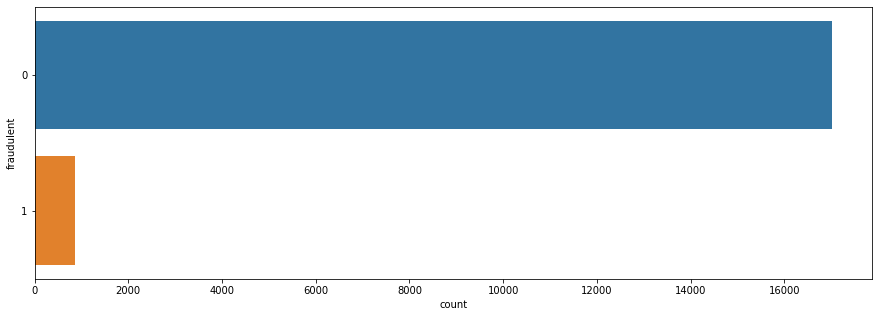

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [11]:
df.groupby('fraudulent')['fraudulent'].count()
#866 are fraud

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [12]:
exp = dict(df.required_experience.value_counts())
del exp['']
exp

{'Associate': 2297,
 'Director': 389,
 'Entry level': 2697,
 'Executive': 141,
 'Internship': 381,
 'Mid-Senior level': 3809,
 'Not Applicable': 1116}

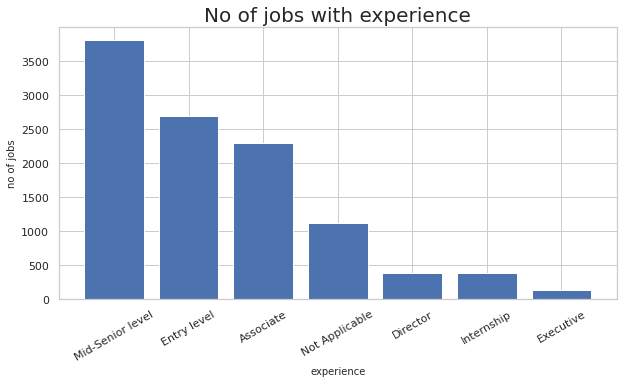

In [13]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title("No of jobs with experience",size=20)
plt.xlabel("experience",size=10)
plt.ylabel("no of jobs",size=10)
plt.xticks(rotation=30)
plt.show()

In [14]:
def split(location):
  l = location.split(',')
  return l[0]
df['country'] = df.location.apply(split) 

In [15]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [16]:
countr = dict(df.country.value_counts()[:14])
del countr['']
countr

{'AU': 214,
 'BE': 117,
 'CA': 457,
 'DE': 383,
 'GB': 2384,
 'GR': 940,
 'IE': 114,
 'IN': 276,
 'NL': 127,
 'NZ': 333,
 'PH': 132,
 'SG': 80,
 'US': 10656}

Text(0.5, 0, 'country')

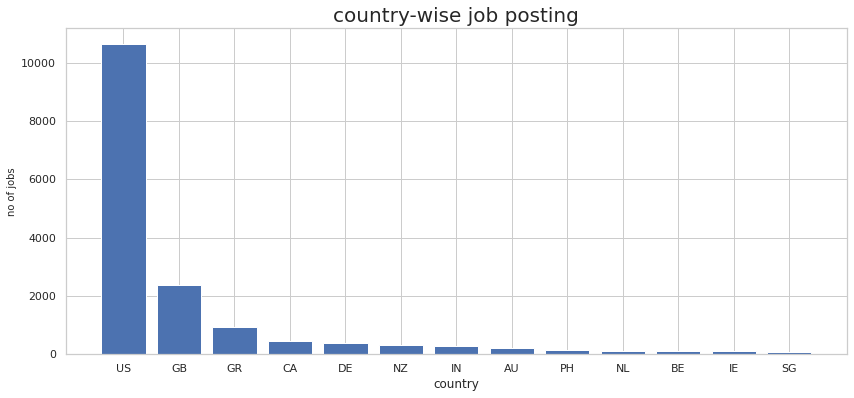

In [17]:
plt.figure(figsize=(14,6))
plt.title("country-wise job posting",size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel("no of jobs",size =10)
plt.xlabel("country")

In [18]:
edu = dict(df.required_education.value_counts()[:7])
del edu['']
edu

{'Associate Degree': 274,
 "Bachelor's Degree": 5145,
 'Certification': 170,
 'High School or equivalent': 2080,
 "Master's Degree": 416,
 'Unspecified': 1397}

Text(0.5, 0, 'country')

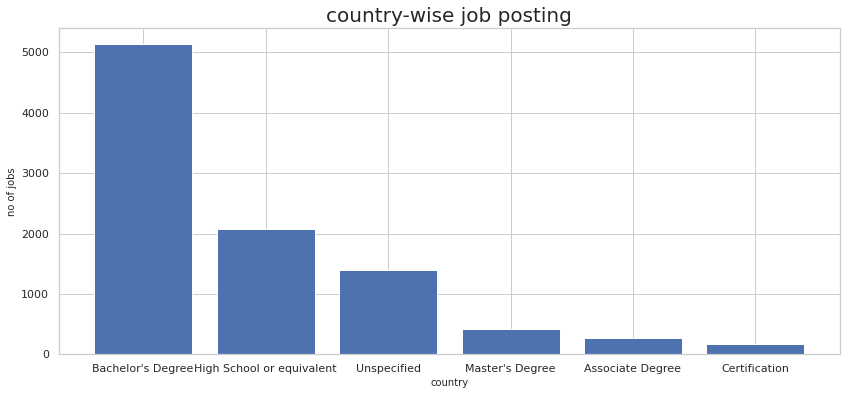

In [19]:
plt.figure(figsize=(14,6))
plt.title("country-wise job posting",size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel("no of jobs",size =10)
plt.xlabel("country",size=10)

In [20]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [21]:
print(df[df.fraudulent==1].title.value_counts()[:10])

Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Name: title, dtype: int64


In [22]:
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [23]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [24]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

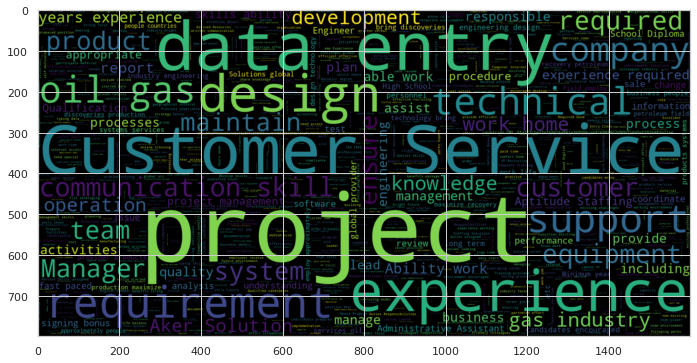

In [25]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(15,6))
wc = WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,
               stopwords=STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation='bilinear')               

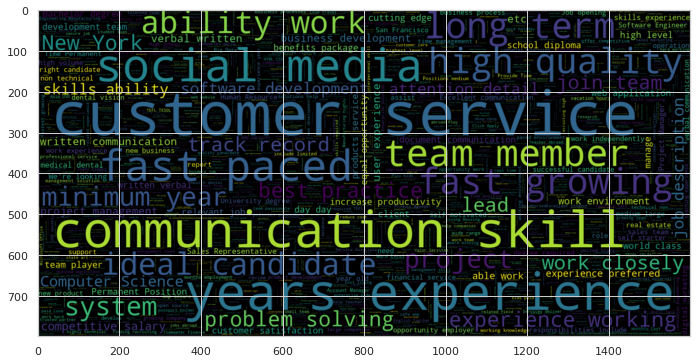

In [26]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(15,6))
wc = WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,
               stopwords=STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation='bilinear')

In [27]:
def clean_text(text):
  return text.strip().lower()   

In [28]:
df['text']=df['text'].apply(clean_text)

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [29]:
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
df.drop(['text'],axis=1,inplace=True)
main_df = pd.concat([df1,df],axis=1)

In [30]:
main_df

,ability,about,all,also,amp,an,and,are,as,at,based,be,best,business,but,by,can,client,clients,communication,company,customer,customers,data,design,development,do,environment,experience,for,from,full,has,have,help,high,if,in,including,industry,...,product,products,project,provide,quality,re,required,sales,service,services,skills,software,solutions,strong,support,team,technical,technology,that,the,their,this,through,time,to,up,us,we,web,well,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041136,0.000000,0.042437,0.036497,0.000000,0.755417,0.000000,0.078690,0.000000,0.000000,0.000000,0.043081,0.034194,0.040139,0.131573,0.000000,0.000000,0.000000,0.037131,0.031393,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.081475,0.000000,0.039914,0.086148,0.054348,0.000000,0.000000,0.000000,0.239001,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.129762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128103,0.053744,0.000000,0.041057,0.000000,0.291706,0.069631,0.000000,0.000000,0.032220,0.184049,0.000000,0.000000,0.205020,0.000000,0.040224,0.000000,0.000000,0.186112,0.051041,0.068055,0.000000,0.000000,0.000000,0.000000,0
1,0.021901,0.094189,0.035393,0.024292,0.041783,0.029768,0.490850,0.056621,0.060058,0.052489,0.043393,0.043897,0.000000,0.078292,0.000000,0.075315,0.085421,0.053196,0.048791,0.021254,0.000000,0.115054,0.000000,0.0,0.000000,0.000000,0.051697,0.022018,0.093993,0.151573,0.089244,0.000000,0.098626,0.062219,0.000000,0.043838,0.000000,0.193813,0.136638,0.000000,...,0.025735,0.0,0.174255,0.000000,0.050271,0.000000,0.000000,0.000000,0.220424,0.000000,0.017504,0.025821,0.000000,0.000000,0.000000,0.046146,0.000000,0.000000,0.107726,0.453226,0.000000,0.070907,0.000000,0.018443,0.152177,0.000000,0.019991,0.130397,0.026809,0.000000,0.000000,0.078038,0.165719,0.043825,0.116867,0.099335,0.000000,0.204896,0.130474,0
2,0.000000,0.000000,0.176805,0.000000,0.041746,0.089224,0.397000,0.113141,0.000000,0.000000,0.000000,0.029238,0.000000,0.000000,0.000000,0.037624,0.000000,0.159444,0.000000,0.000000,0.071816,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.116490,0.035666,0.000000,0.049269,0.000000,0.000000,0.000000,0.000000,0.113906,0.000000,0.050266,...,0.000000,0.0,0.058033,0.046245,0.050226,0.000000,0.000000,0.000000,0.000000,0.219946,0.069953,0.000000,0.048183,0.094784,0.048842,0.000000,0.000000,0.000000,0.215260,0.524319,0.000000,0.000000,0.048004,0.000000,0.350863,0.000000,0.000000,0.026056,0.000000,0.000000,0.000000,0.062375,0.307490,0.058382,0.000000,0.000000,0.000000,0.094483,0.074490,0
3,0.023274,0.000000,0.018806,0.000000,0.000000,0.094903,0.695502,0.000000,0.031912,0.037187,0.000000,0.015550,0.000000,0.145602,0.024417,0.020009,0.000000,0.000000,0.000000,0.022587,0.019097,0.024453,0.054795,0.0,0.000000,0.045668,0.054938,0.070194,0.085617,0.123905,0.000000,0.000000,0.000000,0.016530,0.022761,0.000000,0.000000,0.084809,0.096804,0.053465,...,0.000000,0.0,0.000000,0.049189,0.053423,0.000000,0.024505,0.173110,0.000000,0.023395,0.018601,0.000000,0.051250,0.025204,0.025975,0.065386,0.000000,0.099902,0.049063,0.278846,0.042357,0.000000,0.127649,0.019599,0.335876,0.023620,0.000000,0.069287,0.000000,0.000000,0.023134,0.049759,0.075476,0.046573,0.000000,0.105563,0.019806,0.050248,0.059423,0
4,0.000000,0.000000,0.068008,0.000000,0.040144,0.028600,0.606334,0.081599,0.115404,0.000000,0.000000,0.028117,0.094773,0.037610,0.000000,0.000000,0.000000,0.051109,0.000000,0.040841,0.069060,0.044216,0.049539,0.0,0.000000,0.041288,0.000000,0.000000,0.051603,0.201637,0.000000,0.043902,0.047378,0.000000,0.000000,0.000000,0.000000,0.394325,0.043759,0.000000,...,0.000000,0.0,0.000000,0.000000,0.144897,0.000000,0.000000,0.000000,0.084711,0.169205,0.000000,0.000000,0.092668,0.000000,0.000000,0.029557,0.000000,0.000000,0.029571,0.275018,0.000000,0.000000,0.000000,0.035439,0.269920,0.000000,0.000000,0.050113,0.000000,0.044244,0.000000,0.000000,0.159218,0.028071

In [31]:
y = main_df.iloc[:,-1]
x = main_df.iloc[:,:-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(12516, 100)
(5364, 100)
(12516,)
(5364,)


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model = rfc.fit(x_train,y_train)

In [33]:
print(x_train)

        ability     about       all  ...     years       you      your
15623  0.057079  0.061370  0.000000  ...  0.048575  0.000000  0.000000
17842  0.043222  0.000000  0.034925  ...  0.036783  0.062211  0.073570
6313   0.063813  0.000000  0.025781  ...  0.054305  0.000000  0.000000
8161   0.103440  0.000000  0.100298  ...  0.035211  0.000000  0.017607
1584   0.000000  0.000000  0.442588  ...  0.000000  0.000000  0.000000
...         ...       ...       ...  ...       ...       ...       ...
7567   0.227336  0.000000  0.061231  ...  0.064489  0.054535  0.042995
15534  0.000000  0.000000  0.156004  ...  0.027384  0.046315  0.027386
4971   0.049454  0.000000  0.139858  ...  0.000000  0.284719  0.273574
6141   0.054538  0.087957  0.044068  ...  0.046413  0.000000  0.023208
2566   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000

[12516 rows x 100 columns]


In [34]:
pred = rfc.predict(x_test)
score = accuracy_score(y_test,pred)
score

0.9690529455630127

In [35]:
print('classification report\n')
print(classification_report(y_test,pred))
print('confusion matrix\n')
print(confusion_matrix(y_test,pred))

classification report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5105
           1       0.98      0.37      0.53       259

    accuracy                           0.97      5364
   macro avg       0.97      0.68      0.76      5364
weighted avg       0.97      0.97      0.96      5364

confusion matrix

[[5103    2]
 [ 164   95]]
